In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
g = torch.Generator().manual_seed(2147483647)

In [5]:
words = open("../assets/names.txt", 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))

In [7]:
# String Conversions
stoi = {c : i + 1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {i : c for c, i in stoi.items()}

In [21]:
N = torch.zeros(27, 27, dtype=torch.float32)

In [22]:
b = {}

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        bigram = (ix1, ix2)
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

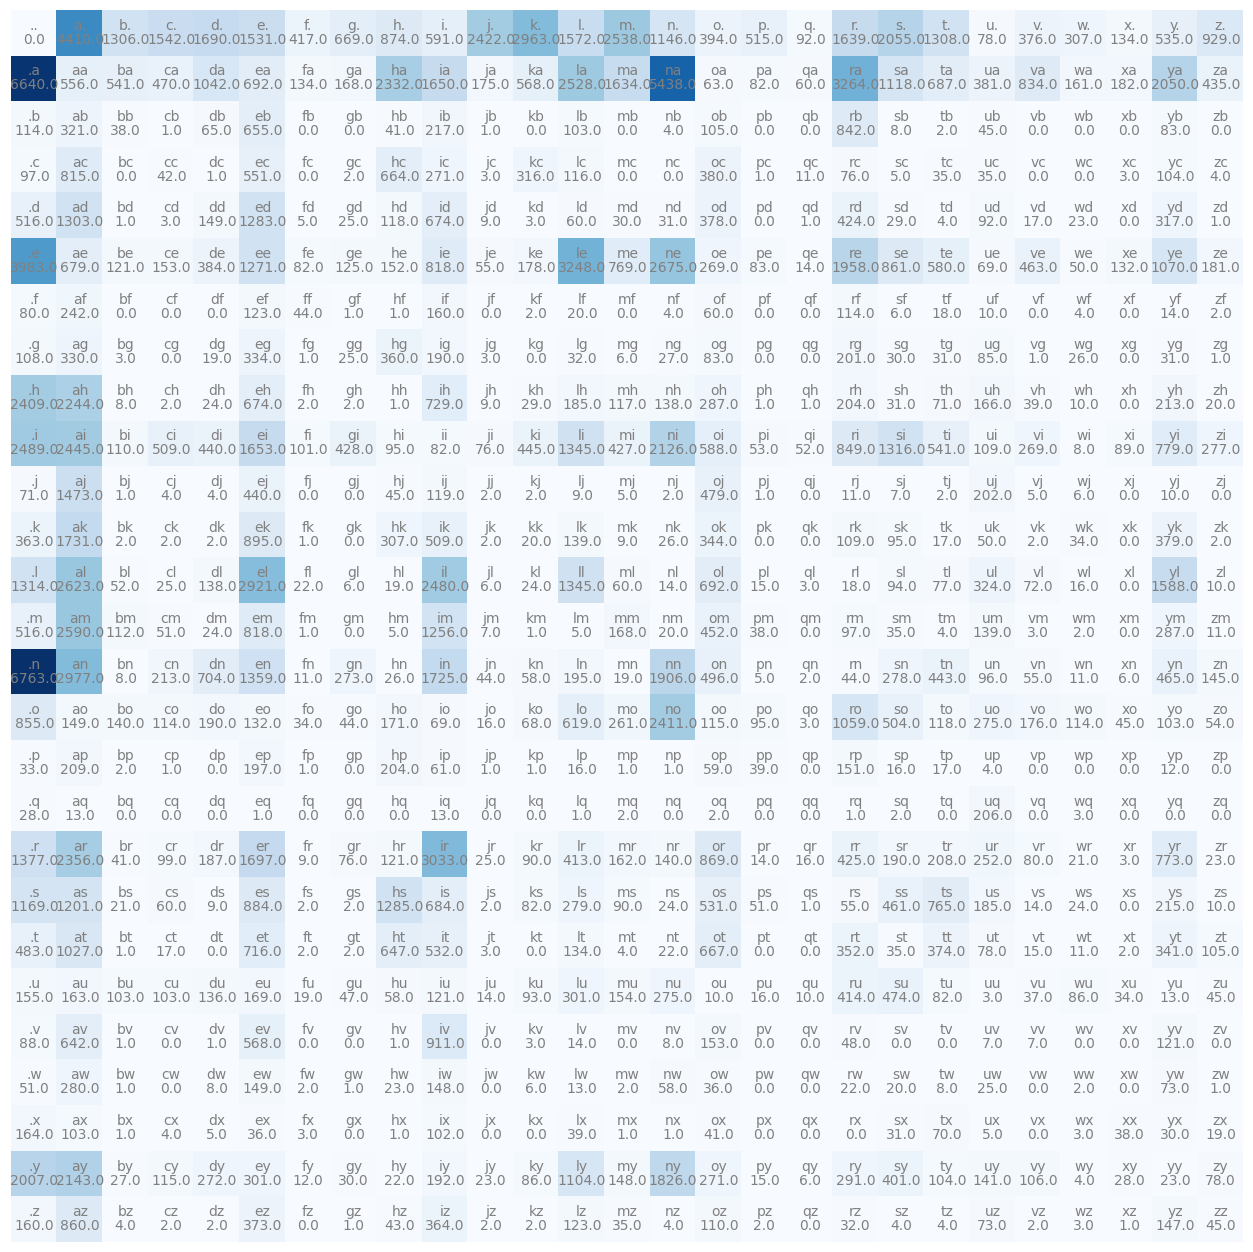

In [25]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chrstr = itos[i] + itos[j]
        plt.text(i, j, chrstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, f'{N[i, j].item()}', ha='center', va='top', color='gray')

plt.axis('off')

In [27]:
for _ in range(10):
    ix = 0
    out = []
    while True:
        if type(ix) is not int:
            break

        p = N[ix] / N[ix].sum()
        ix = torch.multinomial(p, 1, generator=g).item()

        if type(ix) is int:
            out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
